In [1]:
# Import the libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read the csv file & see the dataframe
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
# check rows & columns
df.shape

(11251, 15)

In [7]:
# check information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
# drop blank columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [9]:
# check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# drop null values
df.dropna(inplace=True)

In [11]:
# change the data type for amount column
df['Amount'] = df['Amount'].astype('int')

In [12]:
# check all the columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
# get description for all the numeric columns
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/4278394602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Gender',palette='Set2')


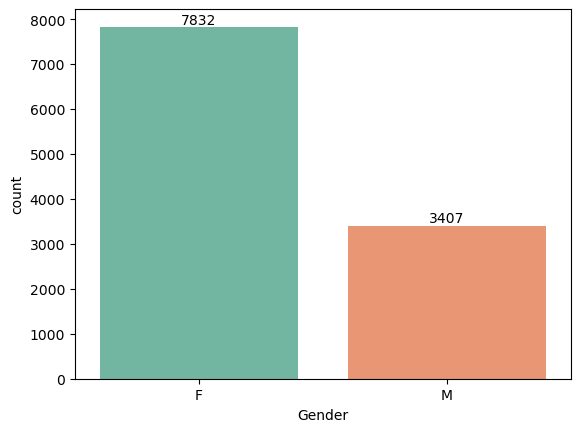

In [15]:
# plotting the number of people based on gender
ax = sns.countplot(data=df, x='Gender',palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/2074019651.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Amount', data=sales_gen, palette='Set2')


<Axes: xlabel='Gender', ylabel='Amount'>

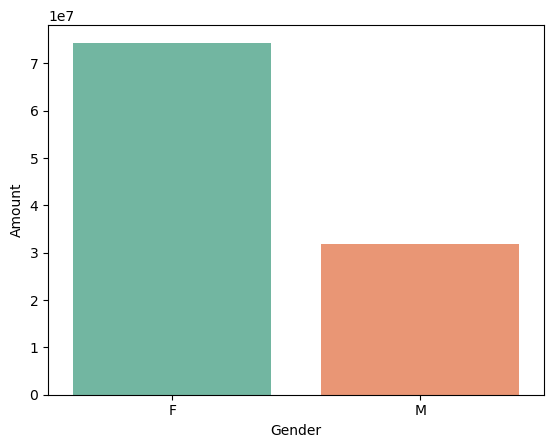

In [16]:
# plotting the total amount based on gender
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender', y='Amount', data=sales_gen, palette='Set2')

### From above graphs we can see that most of the buyers are female and the purchasing power of females are greater than men.

## Age

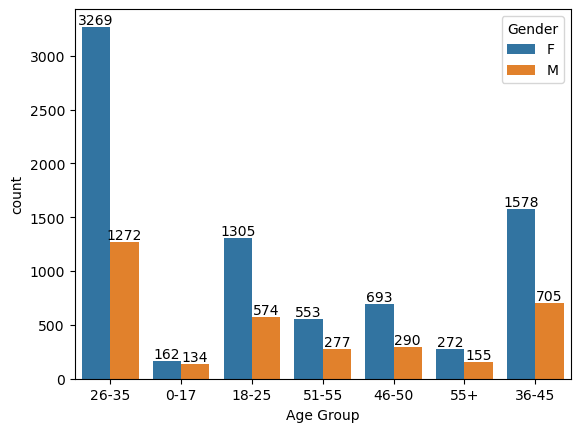

In [18]:
# number of people based on gender
ax = sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/3406956711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_age, x='Age Group', y='Amount',palette='Set2')


<Axes: xlabel='Age Group', ylabel='Amount'>

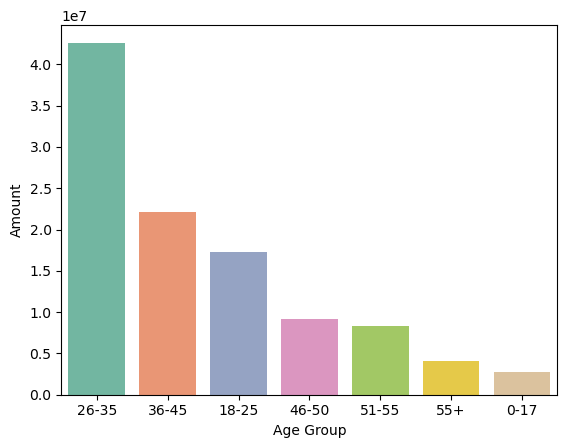

In [21]:
# Total amount vs Age group
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_age, x='Age Group', y='Amount',palette='Set2')

### From above graphs we can see that most buyers are from the age group between 26-35.

## State

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/598512977.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='State', y='Orders', palette='Set2')


<Axes: xlabel='State', ylabel='Orders'>

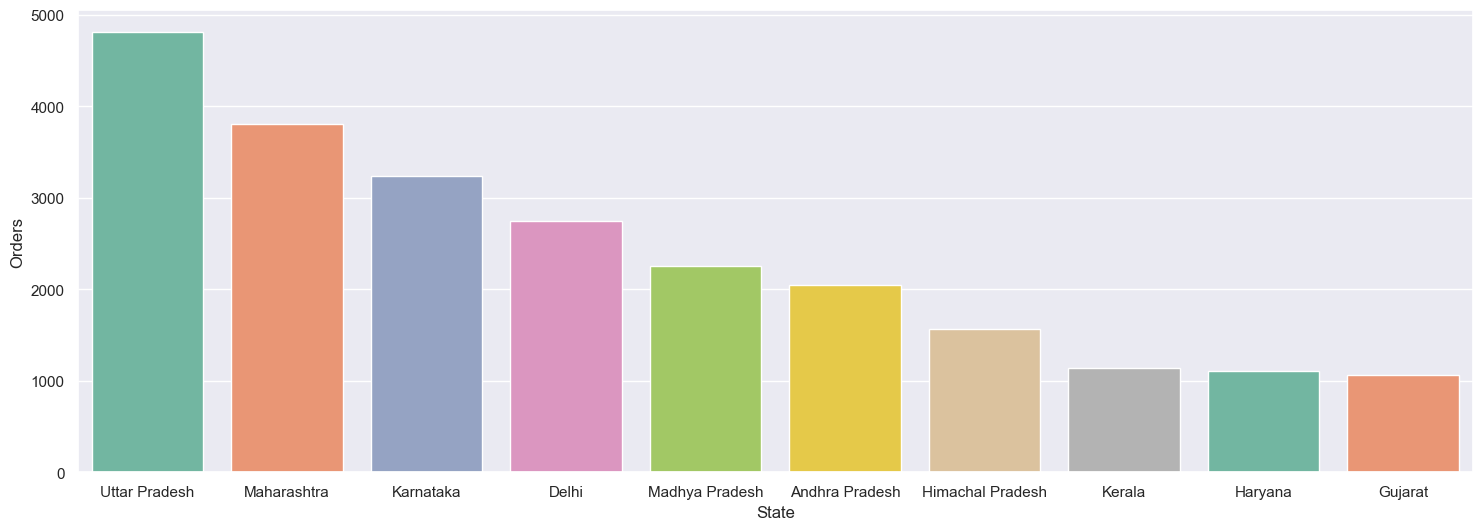

In [24]:
# top 10 states with highest orders
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize': (18,6)})
sns.barplot(data=sales_state, x='State', y='Orders', palette='Set2')

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/3723623718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='State', y='Amount', palette='Set2')


<Axes: xlabel='State', ylabel='Amount'>

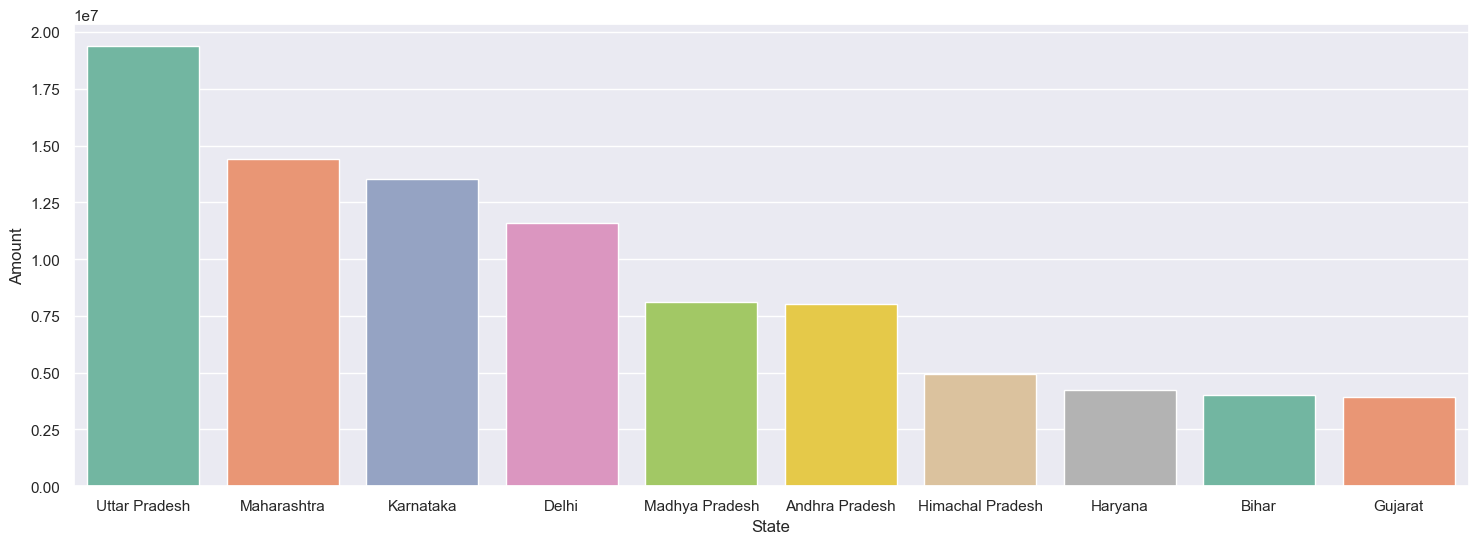

In [25]:
# top 10 states with highest expenditure on orders
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize': (18,6)})
sns.barplot(data=sales_state, x='State', y='Amount', palette='Set2')

### From above graphs we can see that most of the orders & total sales/amount were from Uttar Pradesh, Maharashtra & Karnataka respectively.

## Marital Status

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/3150236391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,x='Marital_Status',palette='Set2')


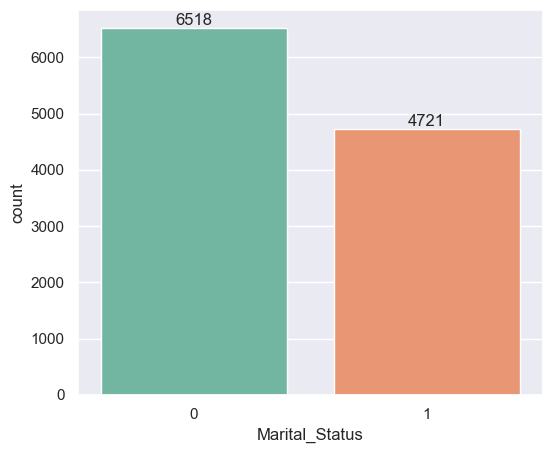

In [34]:
# plotting count based on marital status
ax = sns.countplot(data=df,x='Marital_Status',palette='Set2')

sns.set(rc={'figure.figsize': (6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

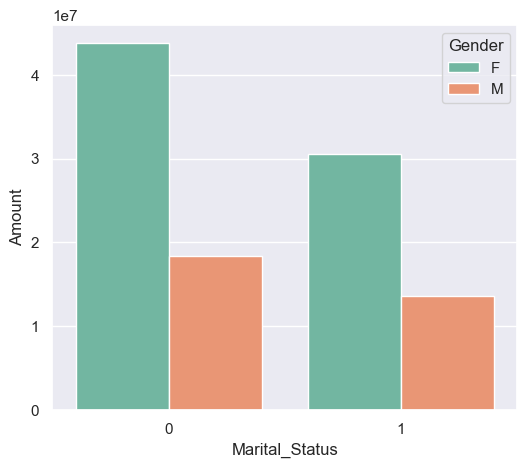

In [35]:
# Total amount vs Marital Status based on Gender
sales_status = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_status, x='Marital_Status', y='Amount', hue='Gender', palette='Set2')

### From above graphs we can see that most of the buyers are married(women) and they have higer purchase power.

## Occupation

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/3149883586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Occupation', palette='Set2')


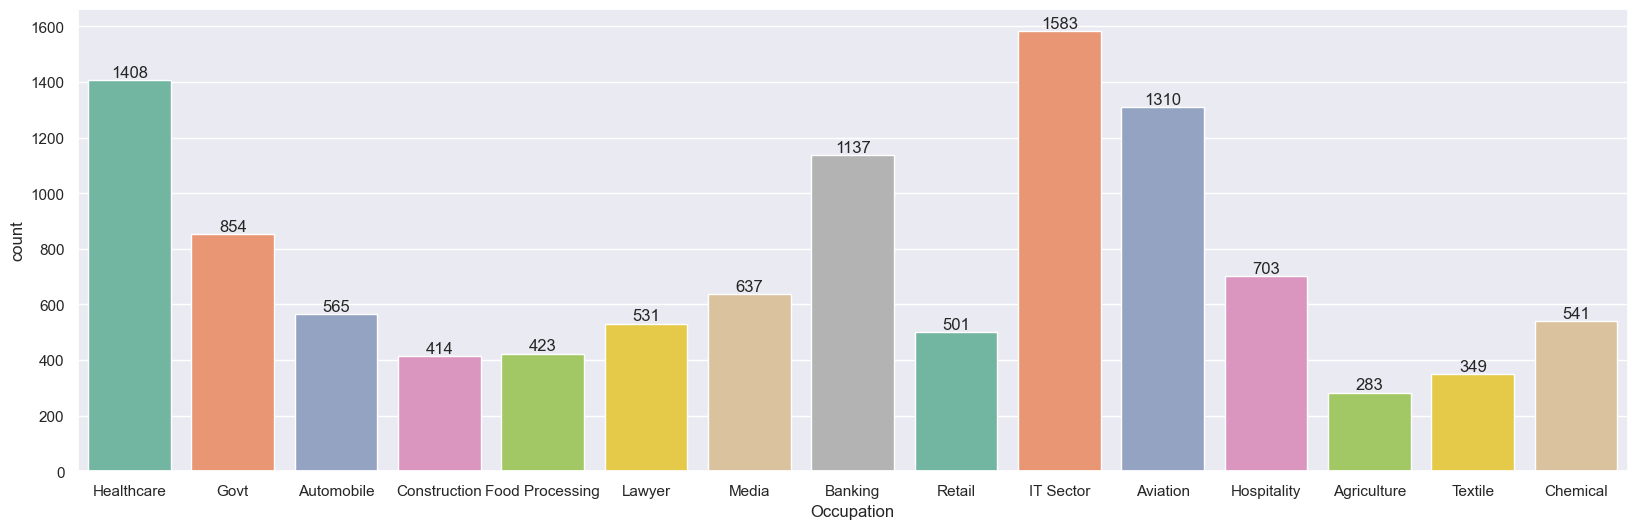

In [36]:
# Total occupations and their counts
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.countplot(data=df, x='Occupation', palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/3715573393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_occupation, x='Occupation', y='Amount',palette='Set2')


<Axes: xlabel='Occupation', ylabel='Amount'>

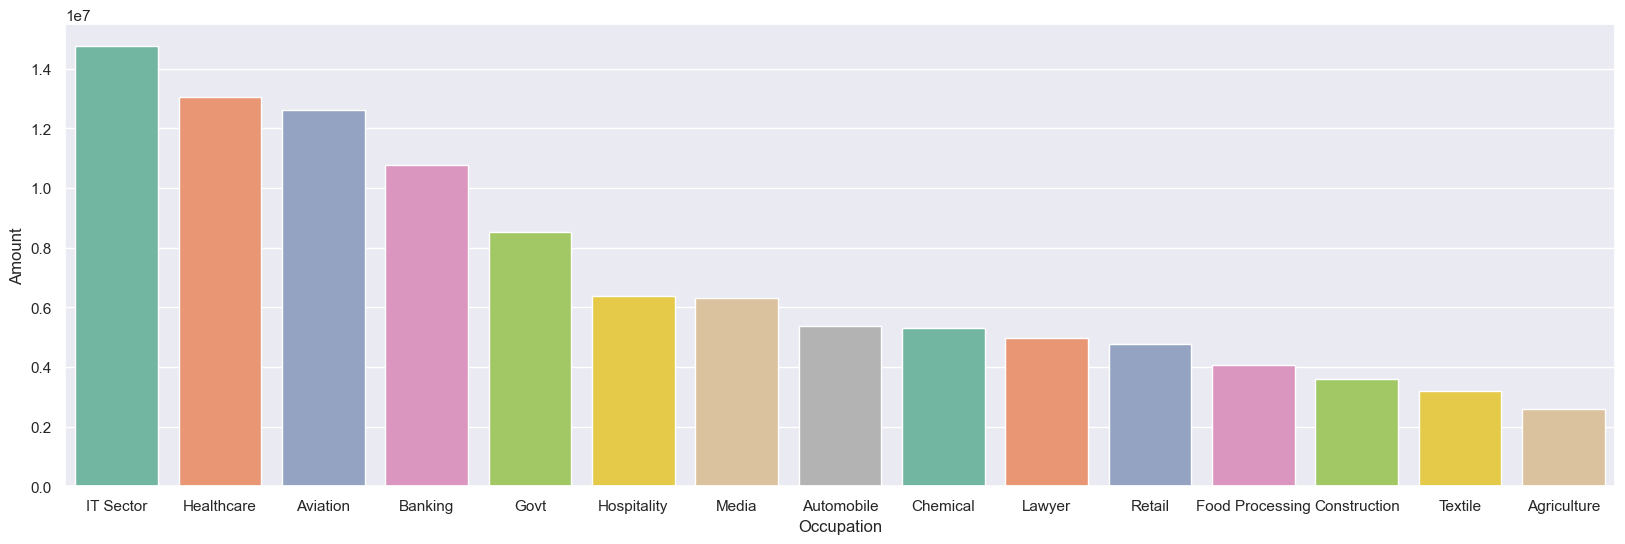

In [38]:
# Total amount according to occupation
sales_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=sales_occupation, x='Occupation', y='Amount',palette='Set2')

### From above graphs we can see that most of the buyers are from IT, Healthcare and Aviation Sector.

## Product Category

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/3534516901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Product_Category', palette='Set2')


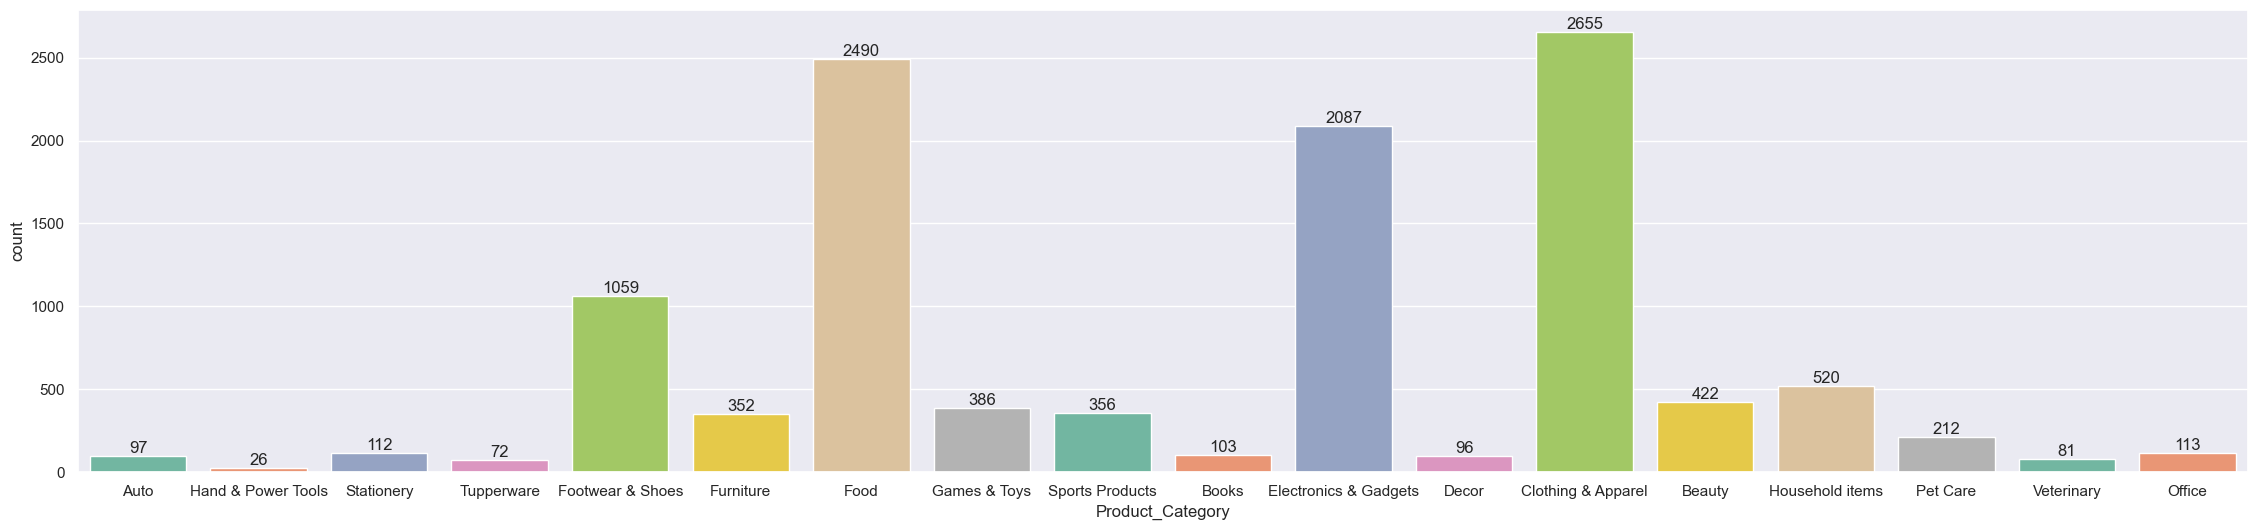

In [41]:
# Total Product category and their counts
sns.set(rc={'figure.figsize':(28,6)})
ax = sns.countplot(data=df, x='Product_Category', palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/2443004447.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_product, x='Product_Category', y='Amount',palette='Set2')


<Axes: xlabel='Product_Category', ylabel='Amount'>

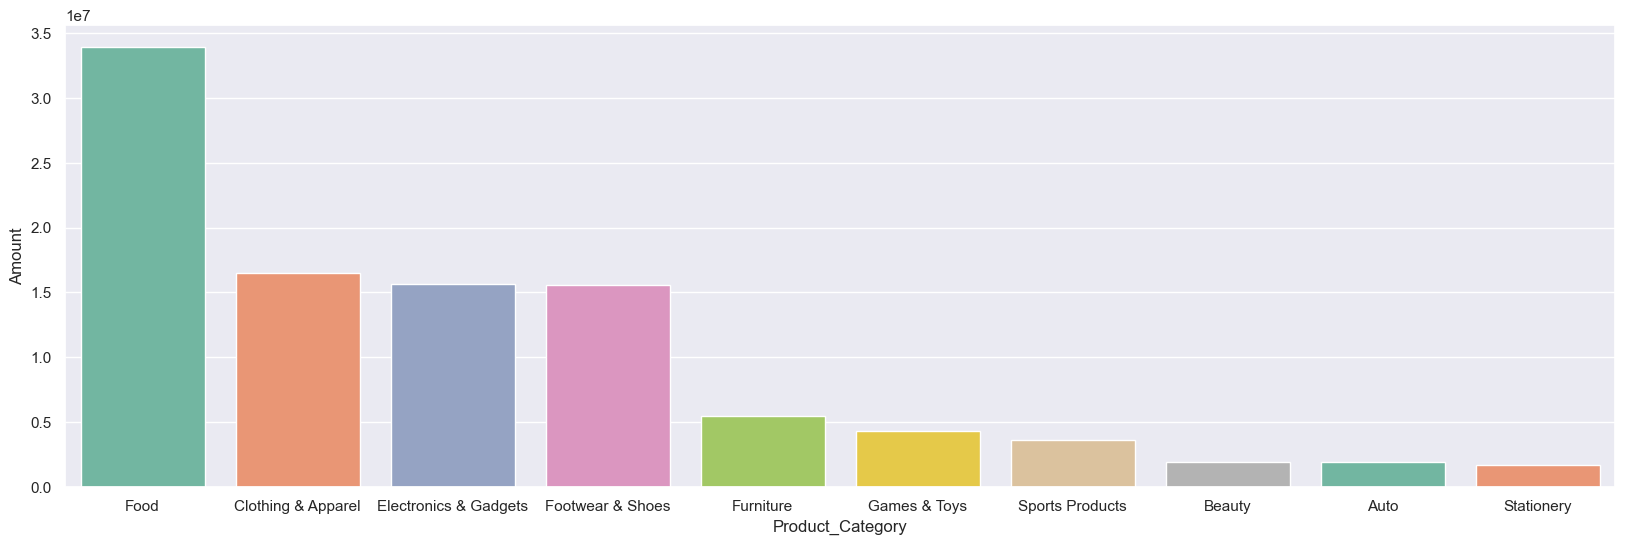

In [44]:
# top 10 Total amount according to product category
sales_product = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=sales_product, x='Product_Category', y='Amount',palette='Set2')

### From above graph we can see that most of the sold products are from Food, Clothing and Electronics category.

## Product ID

/var/folders/bb/zb6dd0td5sxd51w767q2nv4r0000gp/T/ipykernel_89967/2014227345.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_product, x='Product_ID', y='Orders',palette='Set2')


<Axes: xlabel='Product_ID', ylabel='Orders'>

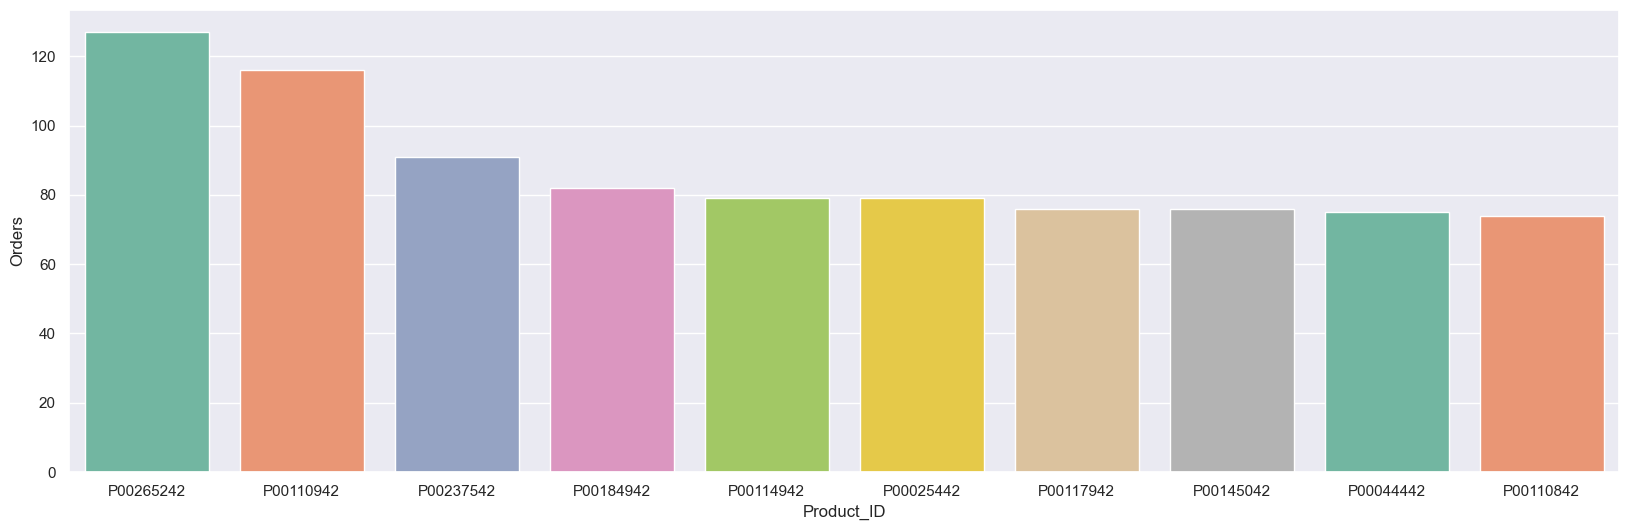

In [46]:
# top 10 Product ID
sales_product = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=sales_product, x='Product_ID', y='Orders',palette='Set2')

<Axes: xlabel='Product_ID'>

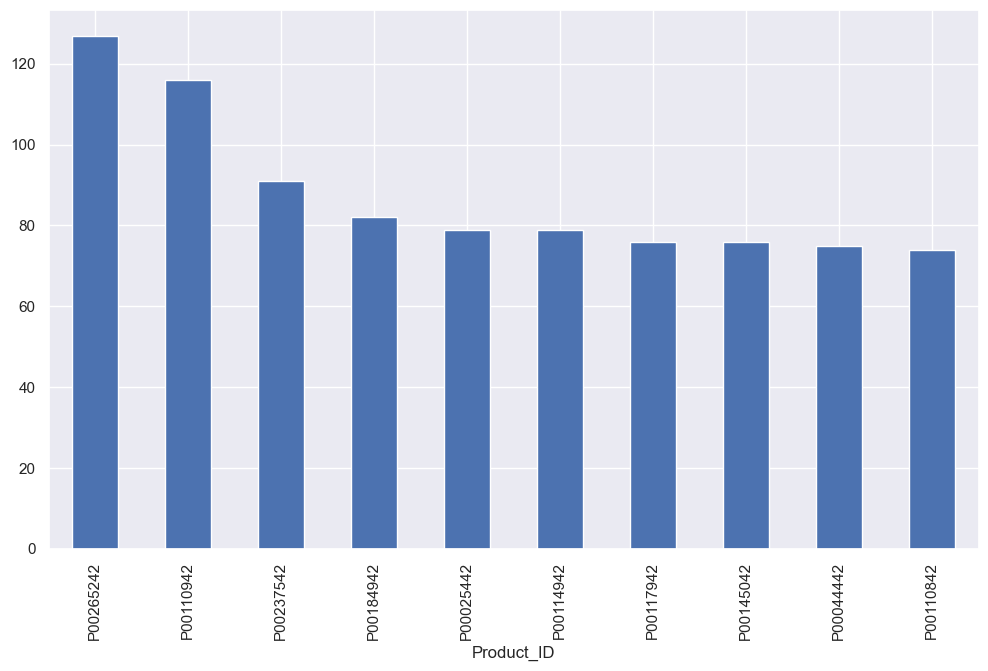

In [47]:
# top 10 most sold products

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

-------

# Conclusion:

## Married women of age group 26-35yrs from UP, Maharashtra and Karnataka working in IT, Healthcare & Aviation Industry are more likely to buy products from Food, Clothing and Electronics Category.